In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tables
from phd.utils.path_tools import find_by_meta
from tabulate import tabulate
from scipy.stats import describe

In [3]:
path = "/mnt/storage2/phd/data/thunderstorm/near_critical/result_0.02_0.1.hdf5"

In [13]:
with tables.open_file(path) as h5file:
    print(h5file)

/mnt/storage2/phd/data/thunderstorm/near_critical/result_0.02_0.1.hdf5 (File) 'Auto convert from binary files'
Last modif.: 'Fri Jan 31 11:31:41 2020'
Object Tree: 
/ (RootGroup) 'Auto convert from binary files'
/sim0001 (Group) 'Auto group from path sim0001'
/sim0001/electron (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0001/gamma (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0001/meta (Array()) ''
/sim0001/number (Table(1000,), fletcher32, shuffle, zlib(3)) ''
/sim0001/positron (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0002 (Group) 'Auto group from path sim0002'
/sim0002/electron (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0002/gamma (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0002/meta (Array()) ''
/sim0002/number (Table(1000,), fletcher32, shuffle, zlib(3)) ''
/sim0002/positron (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0003 (Group) 'Auto group from path sim0003'
/sim0003/electron (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0003/gamma (Table(0,), 

In [10]:
def near_critical(path, target_node="electron"):
    print(f"Secondary particle: {target_node}")
    # paths = find_by_meta(path,target_node=target_node, values_gdml_fieldValueZ=field)
    energy = []
    number = []
    # plt.figure(figsize=(10,10))
    first = True
    with tables.open_file(path) as h5file:
        for i, group in enumerate(h5file.root):
            table = h5file.get_node(group, target_node)
            if first:
                first = False
                print("Primry particle: {}".format(table.attrs["values_macros_particle"]))
                print("Electric field: {}".format(table.attrs["values_gdml_fieldValueZ"]))
            
            energy.append(table.attrs["values_macros_energy"])
            number.append(table.nrows/table.attrs["values_macros_number"])
    plt.plot(energy, number, "*")
    # plt.legend();


## Поведение вблизи критической энергии


Secondary particle: electron
Primry particle: e-
Electric field: 0.0007


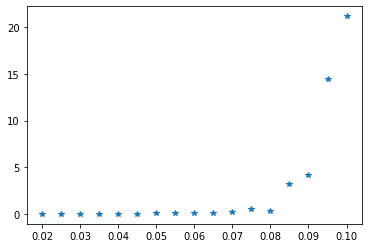

In [11]:
# 0.05 MeV critical energy by tables
path = "/mnt/storage2/phd/data/thunderstorm/near_critical/result_0.02_0.1.hdf5"
near_critical(path)

Secondary particle: gamma
Primry particle: e-
Electric field: 0.0007


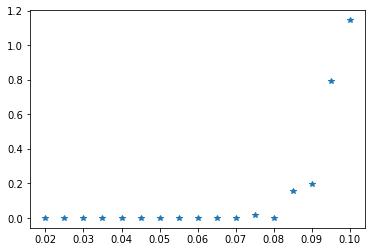

In [40]:
path = "/mnt/storage2/phd/data/thunderstorm/near_critical/result_0.02_0.1.hdf5"
near_critical(path, target_node="gamma")

In [23]:
def plot_secondary(path,group="/sim0001", target_node="electron"):
    plt.figure(figsize=(10,5))
    with tables.open_file(path) as h5file:
        table = h5file.get_node(group, target_node)
        data = table.read()
        plt.subplot(121)
        plt.hist(data["z"])
        plt.subplot(122)
        plt.hist(data["energy"][data["energy"]<1])

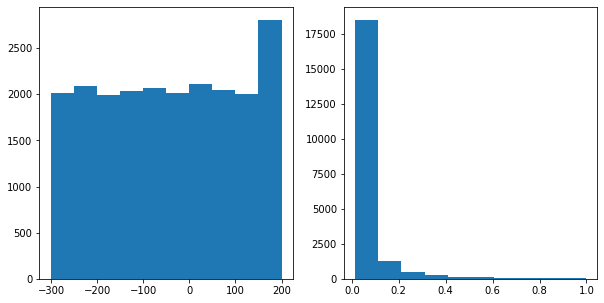

In [24]:
plot_secondary(path, "/sim0017")

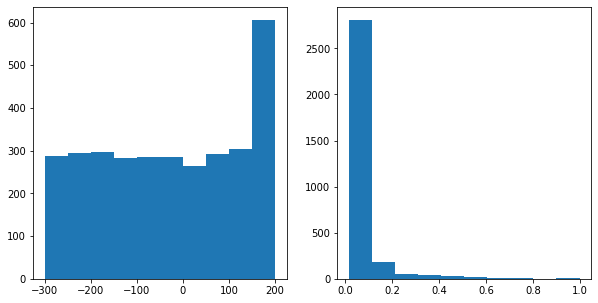

In [25]:
plot_secondary(path, "/sim0014")

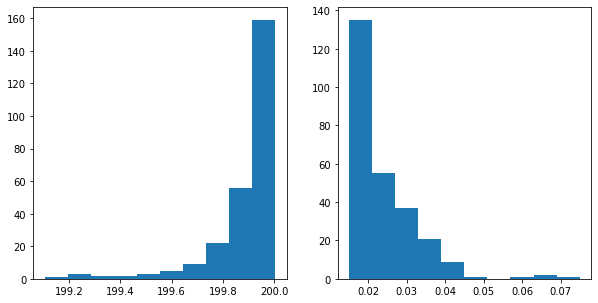

In [26]:
plot_secondary(path, "/sim0013")



# Зависимость числа вторичных от энергии


In [31]:
path = "/mnt/storage2/phd/data/thunderstorm/near_critical/result_0.1_2.hdf5"

Secondary particle: electron
Primry particle: e-
Electric field: 0.0007


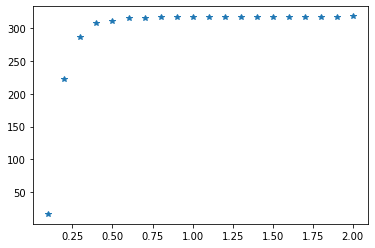

In [32]:
path = "/mnt/storage2/phd/data/thunderstorm/near_critical/result_0.1_2.hdf5"
near_critical(path)


Secondary particle: gamma
Primry particle: e-
Electric field: 0.0007


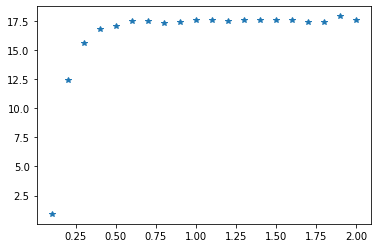

In [39]:
path = "/mnt/storage2/phd/data/thunderstorm/near_critical/result_0.1_2.hdf5"
near_critical(path, target_node="gamma")

In [36]:
path = "/mnt/storage2/phd/data/thunderstorm/near_critical/result_2_100.hdf5"

Secondary particle: electron
Primry particle: e-
Electric field: 0.0007


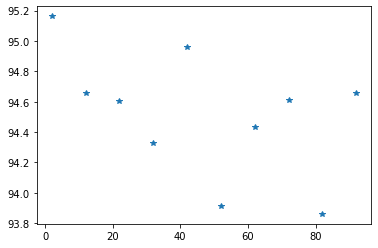

In [37]:
near_critical(path)

Secondary particle: gamma
Primry particle: e-
Electric field: 0.0007


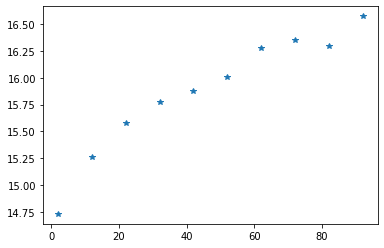

In [38]:
near_critical(path, target_node="gamma")